<a href="https://colab.research.google.com/github/Daivar/PP5_MarketingCampaign/blob/main/%E2%80%9EPP5_Tensorflow_MarketingCampaign_ipynb%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('marketing_campaign.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
marketing_campaign_data = 'marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [32]:
import warnings

warnings.filterwarnings('ignore')

In [33]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [34]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [35]:
len(marketing_campaign_dataframe.columns)

30

In [10]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

In [36]:
marketing_campaign_dataframe['Total spent'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['MntWines'] + marketing_campaign_dataframe['MntFruits'] +
                           marketing_campaign_dataframe['MntMeatProducts'] + marketing_campaign_dataframe['MntFishProducts'] + 
                           marketing_campaign_dataframe['MntSweetProducts'] + marketing_campaign_dataframe['MntGoldProds'], axis=1)

marketing_campaign_dataframe['Total accept cmp'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['AcceptedCmp1'] + marketing_campaign_dataframe['AcceptedCmp2'] +
                           marketing_campaign_dataframe['AcceptedCmp3'] + marketing_campaign_dataframe['AcceptedCmp4'] + 
                           marketing_campaign_dataframe['AcceptedCmp5'], axis=1)

marketing_campaign_dataframe['Total purchases'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['NumDealsPurchases'] + marketing_campaign_dataframe['NumWebPurchases'] +
                           marketing_campaign_dataframe['NumCatalogPurchases'] + marketing_campaign_dataframe['NumStorePurchases'], axis=1)

In [37]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total spent,Total accept cmp,Total purchases
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,0,25
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,6
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,21
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,8
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,19


In [38]:
len(marketing_campaign_dataframe.columns)

33

In [39]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['ID', 'Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases']].copy()

X.columns = ['ID', 'Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases']

In [40]:
X.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total spent,Total accept cmp,Total purchases
0,5524,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25
1,2174,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6
2,4141,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21
3,6182,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8
4,5324,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19


In [41]:
len(X.columns)

29

In [42]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Education', 'Marital_Status'])
X.columns = ['ID', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases', 'Doctor', 'High School', 'Higher Education', 'Master', 'PhD',
             'Absurd Marital Status', 'Alone Marital Status', 'Divorced Marital Status',
             'Married Marital Status', 'Single Marital Status', 'Married Marital Status',
             'Widowed Civil Status', 'Detached Civil Status']

In [43]:
X.head()

,ID,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total spent,Total accept cmp,Total purchases,Doctor,High School,Higher Education,Master,PhD,Absurd Marital Status,Alone Marital Status,Divorced Marital Status,Married Marital Status,Single Marital Status,Married Marital Status,Widowed Civil Status,Detached Civil Status
0,5524,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19,0,0,0,0,1,0,0,0,1,0,0,0,0


In [44]:
len(X.columns)

40

In [45]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

linear_analysis_axisX = X[['MntWines', 'MntMeatProducts', 'MntSweetProducts', 'MntSweetProducts', 'MntFruits', 'MntGoldProds']]

linear_analysis_axisY = X[['Income']]

In [47]:

linear_Xtrain, linear_Xtest, linear_ytrain, linear_ytest = train_test_split(
    linear_analysis_axisX, linear_analysis_axisY, test_size=0.25)

In [48]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(linear_Xtrain, linear_ytrain)

In [49]:
linear_pred = linear_model.predict(linear_Xtest)

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

print('coefficient of determination: ', r2_score(linear_ytest, linear_pred))

coefficient of determination:  0.22767631316812864


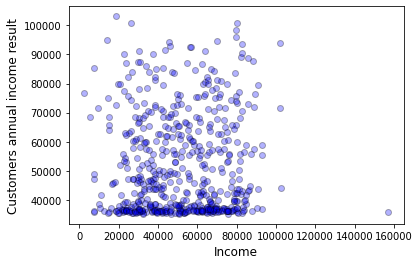

In [53]:
plt.scatter(linear_analysis_axisY.iloc[0:554, :], linear_pred, alpha=0.3, color='blue',
            edgecolors='black')

plt.xlabel('Income', fontsize=12)
plt.ylabel('Customers annual income result', fontsize=12)

plt.show()

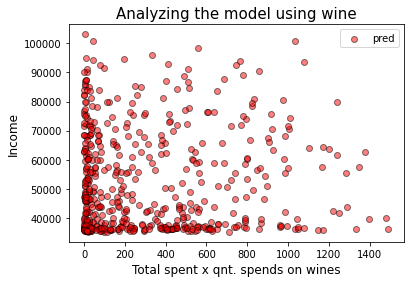

In [54]:
plt.scatter(linear_analysis_axisX.iloc[0:554, [0]], linear_pred, alpha=0.5,
            color='red', edgecolors='black', label='pred')

# plt.scatter(X['Total spent x qnt. spends on wines'], X['Income'], alpha=0.5, color='blue', edgecolors='black', label='actual values')

plt.title('Analyzing the model using wine', fontsize=15)
plt.xlabel('Total spent x qnt. spends on wines', fontsize=12)
plt.ylabel('Income', fontsize=12)

plt.legend()
plt.show()

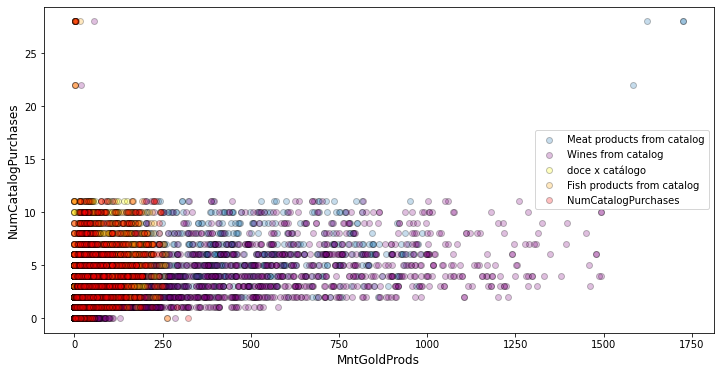

In [55]:
plt.figure(figsize=(12, 6))

plt.scatter(X['MntMeatProducts'], X['NumCatalogPurchases'],
            edgecolors='black', alpha=0.25, label='Meat products from catalog')

plt.scatter(X['MntWines'], X['NumCatalogPurchases'],
            color='purple', edgecolors='black', alpha=0.25, label='Wines from catalog')

plt.scatter(X['MntSweetProducts'], X['NumCatalogPurchases'],
            color='yellow', edgecolors='black', alpha=0.25, label='doce x catálogo')

plt.scatter(X['MntFishProducts'], X['NumCatalogPurchases'],
            color='orange', edgecolors='black', alpha=0.25, label='Fish products from catalog')

plt.scatter(X['MntGoldProds'], X['NumCatalogPurchases'],
            color='red', edgecolors='black', alpha=0.25, label='NumCatalogPurchases')

plt.xlabel('MntGoldProds', fontsize=12)
plt.ylabel('NumCatalogPurchases', fontsize=12)

plt.legend()
plt.show()

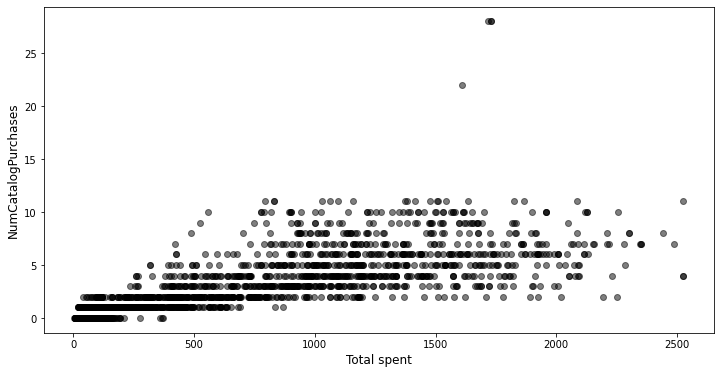

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(X['Total spent'], X['NumCatalogPurchases'],
            color='black', edgecolors='black', alpha=0.5)

plt.xlabel('Total spent', fontsize=12)
plt.ylabel('NumCatalogPurchases', fontsize=12)

plt.show()

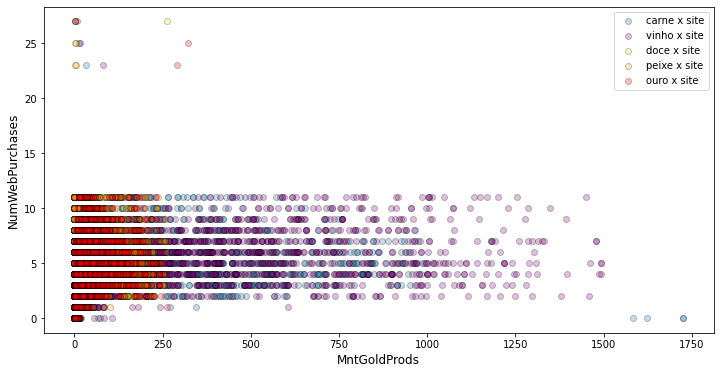

In [57]:
plt.figure(figsize=(12, 6))

plt.scatter(X['MntMeatProducts'], X['NumWebPurchases'],
            edgecolors='black', alpha=0.25, label='carne x site')

plt.scatter(X['MntWines'], X['NumWebPurchases'],
            color='purple', edgecolors='black', alpha=0.25, label='vinho x site')

plt.scatter(X['MntSweetProducts'], X['NumWebPurchases'],
            color='yellow', edgecolors='black', alpha=0.25, label='doce x site')

plt.scatter(X['MntFishProducts'], X['NumWebPurchases'],
            color='orange', edgecolors='black', alpha=0.25, label='peixe x site')

plt.scatter(X['MntGoldProds'], X['NumWebPurchases'],
            color='red', edgecolors='black', alpha=0.25, label='ouro x site')

plt.xlabel('MntGoldProds', fontsize=12)
plt.ylabel('NumWebPurchases', fontsize=12)

plt.legend()
plt.show()

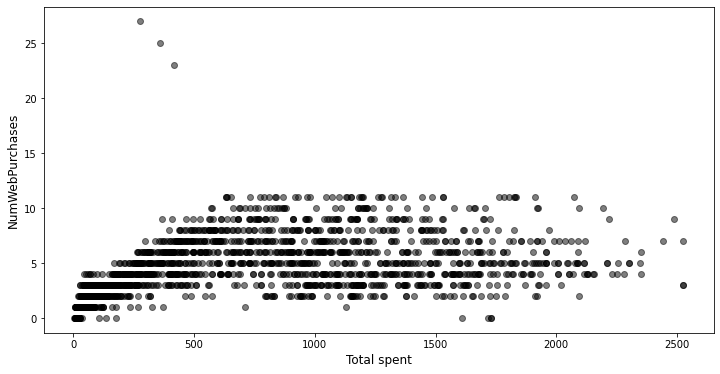

In [58]:
plt.figure(figsize=(12, 6))
plt.scatter(X['Total spent'], X['NumWebPurchases'],
            color='black', edgecolors='black', alpha=0.5)

plt.xlabel('Total spent', fontsize=12)
plt.ylabel('NumWebPurchases', fontsize=12)

plt.show()

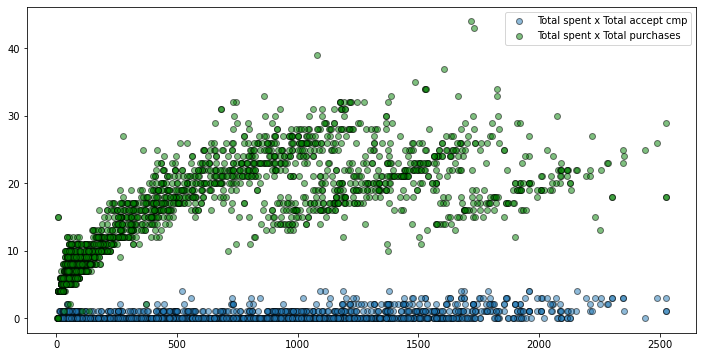

In [59]:
plt.figure(figsize=(12, 6))

plt.scatter(X['Total spent'], X['Total accept cmp'], alpha=0.5,
            edgecolors='black',  label='Total spent x Total accept cmp')

plt.scatter(X['Total spent'], X['Total purchases'], alpha=0.5, color='green',
            edgecolors='black',  label='Total spent x Total purchases')

plt.legend()
plt.show()

In [60]:
deep_learning_X = X[['Complain', 'Total spent', 'Total accept cmp',
                     'Total purchases']]

deep_learning_y = X[['Response']]

In [61]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X, deep_learning_y, test_size=0.25, shuffle=True
)

In [62]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

In [63]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [64]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [65]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [66]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 2.9539 - accuracy: 0.5933
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.7629
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.8333
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.8273
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8315
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.8213
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.8279
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.8165
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.8357
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4586 - accura

In [68]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [69]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[458  12]
 [ 59  25]]
accuracy score for confusion matrix:  0.871841155234657


In [ ]:
display_elements = marketing_campaign_dataframe[['Income', 'Education']]
display_elements.columns = ['Income', 'Education']

import seaborn as sns

plt.figure(figsize=(12, 6))

sns.set()
sns.barplot(x=display_elements['Income'],
            y=display_elements['Education'],
            palette='pastel', order=['Basic', '2n Cycle', 'Graduation', 'Master',
                                     'PhD'])

plt.show()

In [71]:
deep_learning_X_wDegree = X[['Complain', 'Total spent', 'Total accept cmp',
                     'Total purchases', 'Doctor', 'High School', 'Higher Education', 
                     'Master', 'PhD']]

deep_learning_y_wDegree = X[['Response']]

In [72]:
from sklearn.model_selection import train_test_split

deep_learning_Xtrain, deep_learning_Xtest, deep_learning_ytrain, deep_learning_ytest = train_test_split(
    deep_learning_X_wDegree, deep_learning_y_wDegree, test_size=0.25, shuffle=True
)

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

deep_learning_Xtrain = sc.fit_transform(deep_learning_Xtrain)
deep_learning_Xtest = sc.transform(deep_learning_Xtest)

In [74]:
ann = tf.keras.models.Sequential()

In [75]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [76]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [77]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [78]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
ann.fit(deep_learning_Xtrain, deep_learning_ytrain, batch_size=12, epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.8381
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8508
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8508
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8550
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8604
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8586
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8610
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8610
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8604
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 0.3490 - accura

In [80]:
y_test = deep_learning_ytest.iloc[:, :].values

print(np.concatenate((pred.reshape(len(pred), 1), 
                      y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [81]:
import numpy as np

pred = ann.predict(deep_learning_Xtest)
pred = (pred > 0.5)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)

print(cm)
print('accuracy score for confusion matrix: ', accuracy_score(y_test, pred))

[[463   6]
 [ 67  18]]
accuracy score for confusion matrix:  0.868231046931408


In [83]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

wcss = []

for number_of_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    kmeans_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans_labels)
    print('For numer_of_clusters = ', number_of_clusters,
          'Silhouette score is = ', silhouette)
    
    colors = cm.nipy_spectral(kmeans_labels / number_of_clusters)

For numer_of_clusters =  2 Silhouette score is =  0.5722200128740388
For numer_of_clusters =  3 Silhouette score is =  0.5764167108927241
For numer_of_clusters =  4 Silhouette score is =  0.4898784911972524
For numer_of_clusters =  5 Silhouette score is =  0.45789244066501206
For numer_of_clusters =  6 Silhouette score is =  0.4624153282222651
For numer_of_clusters =  7 Silhouette score is =  0.43911092729757734
For numer_of_clusters =  8 Silhouette score is =  0.40247664099813635
For numer_of_clusters =  9 Silhouette score is =  0.37151755909729584
For numer_of_clusters =  10 Silhouette score is =  0.3704187172070237
For numer_of_clusters =  11 Silhouette score is =  0.350722591528199


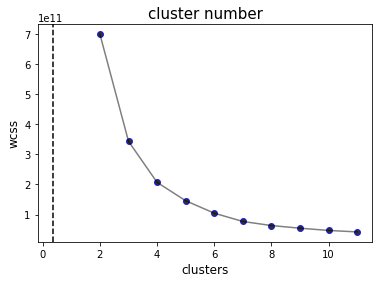

In [84]:
plt.plot(range(2, 12), wcss[0:12], alpha=0.5, color='black')
plt.scatter(range(2, 12), wcss[0:12], alpha=0.8, color='black', edgecolors='blue')
plt.axvline(silhouette, color='black', linestyle='--')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

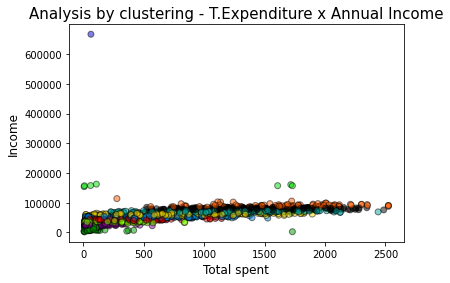

In [85]:
plt.scatter(X['Total spent'], X['Income'], 
            c=colors, alpha=0.5, edgecolors='black')

plt.title('Analysis by clustering - T.Expenditure x Annual Income', fontsize=15)
plt.xlabel('Total spent', fontsize=12)
plt.ylabel('Income', fontsize=12)

plt.show()

In [87]:
"""Using marketing_campaign_dataframe for X and y because I'm getting a weird error with X in this cell"""

X = marketing_campaign_dataframe[['Complain', 'Total spent', 'Total accept cmp',
                                  'Total purchases']]

y = marketing_campaign_dataframe[['Response']]

In [88]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [89]:
for content in y:
    y.dropna(subset=[content], inplace=True)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True,
                                                    random_state=100)

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)

In [93]:
knn_pred = knn.predict(X_test)

In [94]:
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.8401785714285714


In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.85714286 0.79464286 0.78571429 0.82142857 0.79464286 0.83928571
 0.90178571 0.84821429 0.86607143 0.86607143]


In [96]:
print(knn.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]


In [97]:
from sklearn import svm

svm = svm.SVC().fit(X_train, y_train)

In [98]:
svm_pred = svm.predict(X_test)

In [99]:
svm_acc = accuracy_score(y_test, svm_pred)
print('accuracy score for svm: ', svm_acc)

accuracy score for svm:  0.8660714285714286


In [100]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.88392857 0.875      0.82142857 0.89285714 0.83928571 0.83928571
 0.89285714 0.85714286 0.875      0.875     ]


In [101]:
print(svm.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]


In [102]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1).fit(X_train, y_train)

In [103]:
xgb_pred = xgb_model.predict(X_test)

In [104]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print('accuracy score for xgb: ', xgb_acc)

accuracy score for xgb:  0.8669642857142857


In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [0.88392857 0.83928571 0.82142857 0.91071429 0.80357143 0.83928571
 0.89285714 0.85714286 0.875      0.875     ]


In [106]:
print(xgb_model.predict(sc.transform([[2, 2500, 1, 5]])) > 0.5)

[False]
